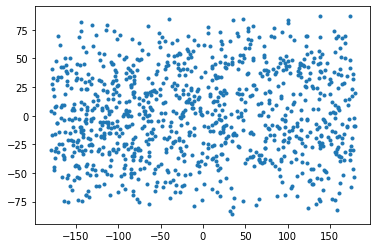

In [1]:
import matplotlib.pyplot as plt
from gprm import PointDistributionOnSphere

pts = PointDistributionOnSphere(distribution_type='marsaglia', N=1000)

plt.plot(pts.longitude,pts.latitude,'.')

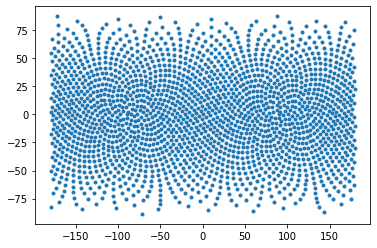

In [2]:
pts = PointDistributionOnSphere(distribution_type='fibonacci', N=2000)

plt.plot(pts.longitude,pts.latitude,'.')

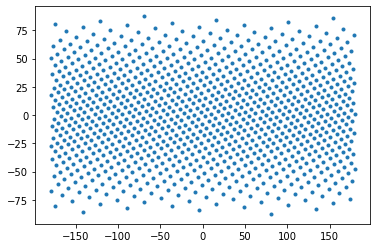

In [3]:
pts = PointDistributionOnSphere(distribution_type='spiral', N=1000)

plt.plot(pts.longitude,pts.latitude,'.')


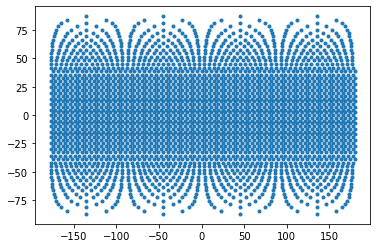

In [4]:
pts = PointDistributionOnSphere(distribution_type='healpix', N=16)

plt.plot(pts.longitude,pts.latitude,'.')

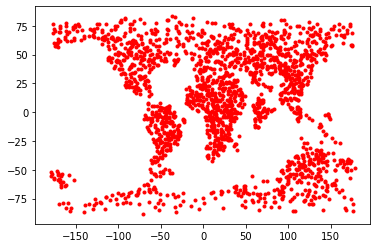

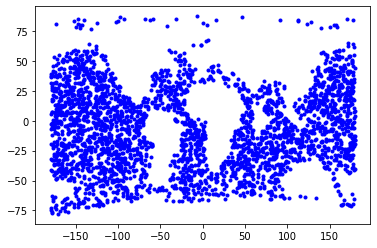

In [5]:
from gprm import ReconstructionModel
from gprm.utils.spatial import rasterise_polygons

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_continent_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/ContinentalPolygons/Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz')


pts = PointDistributionOnSphere(distribution_type='marsaglia', N=5000)


pts_mask_continents = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 50., masking='outside')
pts_mask_oceans = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 50., masking='inside')


plt.plot(pts_mask_continents.to_lat_lon_array()[:,1], pts_mask_continents.to_lat_lon_array()[:,0], 'r.')
plt.show()

plt.plot(pts_mask_oceans.to_lat_lon_array()[:,1], pts_mask_oceans.to_lat_lon_array()[:,0], 'b.')
plt.show()


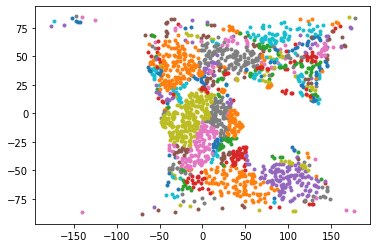

In [6]:
pts_mask = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 150., preserve_polygon_attributes=True)

for pts_group in pts_mask:
    plt.plot(pts_group.get_geometry().to_lat_lon_array()[:,1], pts_group.get_geometry().to_lat_lon_array()[:,0], '.')


68601
67352
67350
67301
65702
65702
64701
61601
61502
61404
61401
60406
60405
60404
60402
60401
60302
60301
60201
50602
50601
44101
44100
44100
43400
43301
43300
43300
43207
43206
43205
43205
43202
43200
43102
43101
42400
42300
42300
42201
42200
42102
29800
28900
28800
28011
18203
18202
18106
18106
18106
18104
16141
16140
16130
16130
16123
16122
16121
16121
16121
16112
16110
16110
16105
16102
16101
7701
7250
3446
3203
3201
2901
890
889
886
884
869
868
866
851
850
847
847
845
844
836
836
835
834
833
827
825
824
823
823
821
815
813
813
806
804
804
804
802
802
802
802
801
737
737
735
720
718
715
714
713
712
709
706
702
701
699
698
698
697
697
687
684
681
681
680
678
677
675
673
669
668
659
659
657
652
651
649
648
647
646
631
630
628
624
621
619
616
615
615
614
613
612
612
612
610
607
606
604
604
603
603
602
602
601
601
601
601
591
590
580
567
566
565
551
526
525
522
521
520
514
514
514
506
505
505
503
502
501
501
501
468
467
466
464
462
461
460
459
458
457
456
455
454
453
451
450
430
430


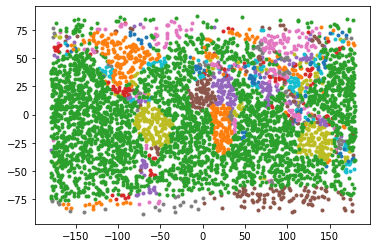

In [13]:
pts_mask = pts.mask(M2016.continent_polygons, M2016.rotation_model, reconstruction_time = 0., preserve_polygon_attributes=True, masking=None)

for pts_group in pts_mask:
    #NB currently only returns shapefile attributes...
    print(pts_group.get_shapefile_attribute('PLATEID1'))
    plt.plot(pts_group.get_geometry().to_lat_lon_array()[:,1], pts_group.get_geometry().to_lat_lon_array()[:,0], '.')
